# 시계열분석/회귀 문제 EDA

In [1]:
# 기본 라이브러리 설치 및 파일 가져오기

import pandas as pd     # 데이터 처리와 분석을 위한 라이브러리
import numpy as np
import matplotlib.pyplot as plt   # 데이터 시각화를 위한 라이브러리 
import seaborn as sns

train_df = pd.read_csv("train.csv", index_col=0)  # 파일 가져오기
train_df  # 데이터 형식과 크기 확인

최고기온  최저기온   일교차  강수량  평균습도  평균풍속  일조합    일사합   일조율  평균기온
일시                                                                   
1960-01-01   2.2  -5.2   7.4  NaN  68.3   1.7  6.7    NaN   NaN  -1.6
1960-01-02   1.2  -5.6   6.8  0.4  87.7   1.3  0.0    NaN   NaN  -1.9
1960-01-03   8.7  -2.1  10.8  0.0  81.3   3.0  0.0    NaN   NaN   4.0
1960-01-04  10.8   1.2   9.6  0.0  79.7   4.4  2.6    NaN   NaN   7.5
1960-01-05   1.3  -8.2   9.5  NaN  44.0   5.1  8.2    NaN   NaN  -4.6
...          ...   ...   ...  ...   ...   ...  ...    ...   ...   ...
2022-12-27   3.3  -7.3  10.6  NaN  69.8   1.8  8.8  10.25  91.7  -2.6
2022-12-28   0.1  -6.0   6.1  0.1  58.1   2.5  8.7  10.86  90.6  -3.3
2022-12-29   2.1  -7.8   9.9  0.0  56.3   1.7  9.0  10.88  93.8  -2.9
2022-12-30   2.3  -4.4   6.7  0.0  65.6   1.9  7.9  10.84  82.3  -1.8
2022-12-31   2.1  -5.1   7.2  0.0  65.5   1.4  1.1   4.16  11.5  -1.2

[23011 rows x 10 columns]

In [2]:
# 시계열데이터인 점을 고려하여 '일시'열(현재는 인덱스)을 날짜 데이터 형식으로 바꿔주어야 합니다
# 날짜 데이터 변환
train_df.index = pd.to_datetime(train_df.index)

# 데이터의 시간 간격 지정
train_df.index.freq = 'D'

In [3]:
train_df.head()

최고기온  최저기온   일교차  강수량  평균습도  평균풍속  일조합  일사합  일조율  평균기온
일시                                                                
1960-01-01   2.2  -5.2   7.4  NaN  68.3   1.7  6.7  NaN  NaN  -1.6
1960-01-02   1.2  -5.6   6.8  0.4  87.7   1.3  0.0  NaN  NaN  -1.9
1960-01-03   8.7  -2.1  10.8  0.0  81.3   3.0  0.0  NaN  NaN   4.0
1960-01-04  10.8   1.2   9.6  0.0  79.7   4.4  2.6  NaN  NaN   7.5
1960-01-05   1.3  -8.2   9.5  NaN  44.0   5.1  8.2  NaN  NaN  -4.6

In [4]:
# 데이터 분포(data distribution) 확인
train_df.info()

# 모두 시계열성을 가지며, Numerical variable
# 평균 기온은 계절성과 연관이 있기 때문에 계절성을 살려주는 게 좋을 듯 -> 계절성 중심 target 변수 영향 확인

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 23011 entries, 1960-01-01 to 2022-12-31
Freq: D
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   최고기온    23008 non-null  float64
 1   최저기온    23008 non-null  float64
 2   일교차     23007 non-null  float64
 3   강수량     9150 non-null   float64
 4   평균습도    23011 non-null  float64
 5   평균풍속    23007 non-null  float64
 6   일조합     22893 non-null  float64
 7   일사합     18149 non-null  float64
 8   일조율     22645 non-null  float64
 9   평균기온    23011 non-null  float64
dtypes: float64(10)
memory usage: 1.9 MB


## 결측치

In [5]:
train_df.isnull().sum() # 각 열별로 결측치의 개수를 파악할 수 있음

최고기온        3
최저기온        3
일교차         4
강수량     13861
평균습도        0
평균풍속        4
일조합       118
일사합      4862
일조율       366
평균기온        0
dtype: int64

In [6]:
# 결측치 행 정보 확인
train_df[train_df['최고기온'].isnull()]

최고기온  최저기온  일교차  강수량  평균습도  평균풍속  일조합   일사합   일조율  평균기온
일시                                                                 
1967-02-19   NaN   NaN  NaN  NaN  62.0   1.8  9.5   NaN  93.1  -1.7
1973-10-16   NaN   NaN  NaN  0.4  74.0   1.8  3.5  9.24  29.7  12.3
2017-10-12   NaN   8.8  NaN  NaN  71.0   2.0  NaN  2.23   0.0  11.4

In [7]:
train_df[train_df['최저기온'].isnull()]

최고기온  최저기온  일교차    강수량  평균습도  평균풍속  일조합   일사합   일조율  평균기온
일시                                                                   
1967-02-19   NaN   NaN  NaN    NaN  62.0   1.8  9.5   NaN  93.1  -1.7
1973-10-16   NaN   NaN  NaN    0.4  74.0   1.8  3.5  9.24  29.7  12.3
2022-08-08  28.4   NaN  NaN  129.6  91.6   3.3  NaN   NaN   0.0  26.8

In [8]:
train_df[train_df['평균풍속'].isnull()]

최고기온  최저기온   일교차  강수량  평균습도  평균풍속   일조합    일사합   일조율  평균기온
일시                                                                    
1983-07-16  26.5  21.3   5.2  3.9  79.5   NaN   2.2   8.02  15.2  24.2
2017-10-14  20.5   9.0  11.5  NaN  42.8   NaN  10.6  10.58  93.8  14.4
2017-12-05  -0.4  -8.2   7.8  0.1  40.1   NaN   2.1   0.86  21.6  -4.2
2017-12-06   6.0  -4.5  10.5  1.2  72.6   NaN   7.7   6.14  79.4   0.2

In [9]:
train_df[train_df['일교차'].isnull()]
# 데이터 전체 크기에서 비율이 작은 결측치를 가진 평균 풍속과 일교차는 제거하고, 
# 최고기온과 최저기온은 NaN값인 날의 앞/뒤 날들의 평균 최고/최저 온도로 채우기

최고기온  최저기온  일교차    강수량  평균습도  평균풍속  일조합   일사합   일조율  평균기온
일시                                                                   
1967-02-19   NaN   NaN  NaN    NaN  62.0   1.8  9.5   NaN  93.1  -1.7
1973-10-16   NaN   NaN  NaN    0.4  74.0   1.8  3.5  9.24  29.7  12.3
2017-10-12   NaN   8.8  NaN    NaN  71.0   2.0  NaN  2.23   0.0  11.4
2022-08-08  28.4   NaN  NaN  129.6  91.6   3.3  NaN   NaN   0.0  26.8

In [10]:
# 최고/최저 기온 Nan값 채우기
train_df['최고기온'] = train_df['최고기온'].fillna((train_df['최고기온'].shift() + train_df['최고기온'].shift(-1)) / 2)
train_df['최저기온'] = train_df['최저기온'].fillna((train_df['최저기온'].shift() + train_df['최저기온'].shift(-1)) / 2)

In [11]:
# 검증
train_df.loc['1967-02-18':'1967-02-20']

최고기온  최저기온   일교차  강수량  평균습도  평균풍속  일조합  일사합   일조율  평균기온
일시                                                                 
1967-02-18  0.70 -9.30  10.0  NaN  58.0   2.5  8.4  NaN  77.1  -4.6
1967-02-19  3.25 -6.15   NaN  NaN  62.0   1.8  9.5  NaN  93.1  -1.7
1967-02-20  5.80 -3.00   8.8  NaN  58.5   2.4  1.0  NaN   9.1   1.7

In [12]:
# 결측치가 있는 일교차와 평균 풍속 제거
train_df = train_df.dropna(subset=['평균풍속', '일교차'])

In [13]:
train_df

최고기온  최저기온   일교차  강수량  평균습도  평균풍속  일조합    일사합   일조율  평균기온
일시                                                                   
1960-01-01   2.2  -5.2   7.4  NaN  68.3   1.7  6.7    NaN   NaN  -1.6
1960-01-02   1.2  -5.6   6.8  0.4  87.7   1.3  0.0    NaN   NaN  -1.9
1960-01-03   8.7  -2.1  10.8  0.0  81.3   3.0  0.0    NaN   NaN   4.0
1960-01-04  10.8   1.2   9.6  0.0  79.7   4.4  2.6    NaN   NaN   7.5
1960-01-05   1.3  -8.2   9.5  NaN  44.0   5.1  8.2    NaN   NaN  -4.6
...          ...   ...   ...  ...   ...   ...  ...    ...   ...   ...
2022-12-27   3.3  -7.3  10.6  NaN  69.8   1.8  8.8  10.25  91.7  -2.6
2022-12-28   0.1  -6.0   6.1  0.1  58.1   2.5  8.7  10.86  90.6  -3.3
2022-12-29   2.1  -7.8   9.9  0.0  56.3   1.7  9.0  10.88  93.8  -2.9
2022-12-30   2.3  -4.4   6.7  0.0  65.6   1.9  7.9  10.84  82.3  -1.8
2022-12-31   2.1  -5.1   7.2  0.0  65.5   1.4  1.1   4.16  11.5  -1.2

[23003 rows x 10 columns]

In [14]:
# 각 컬럼별 결측치 수 계산
missing_values = train_df.isnull().sum()

# 결측치가 있는 컬럼 이름 추출
columns_with_missing_values = missing_values[missing_values != 0].index

# 결측치가 있는 컬럼들에 대한 결측치 수 계산
col = train_df[columns_with_missing_values].isnull().sum()

col

강수량    13858
일조합      116
일사합     4860
일조율      366
dtype: int64

지금 남아있는 변수들은 결측값 비중이 있으나, 무작정 지우기보단 어차피 변수를 대체할 수 있을 것으로 보이기 때문에 차후 결측치 처리

## 상관관계 확인

C:\Users\DOHS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\utils.py:84: UserWarning: Glyph 52572 (\N{HANGUL SYLLABLE COE}) missing from current font.
  fig.canvas.draw()
C:\Users\DOHS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\utils.py:84: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  fig.canvas.draw()
C:\Users\DOHS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\utils.py:84: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.draw()
C:\Users\DOHS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\utils.py:84: UserWarning: Glyph 50728 (\N{HANGUL SYLLABLE ON}) missing from current f

Text(0.5, 1.0, 'Correlation Heatmap')

C:\Users\DOHS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\events.py:82: UserWarning: Glyph 52572 (\N{HANGUL SYLLABLE COE}) missing from current font.
  func(*args, **kwargs)
C:\Users\DOHS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\events.py:82: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  func(*args, **kwargs)
C:\Users\DOHS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\events.py:82: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  func(*args, **kwargs)
C:\Users\DOHS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\events.py:82: UserWarning: Glyph 50728 (\N{HANGUL 

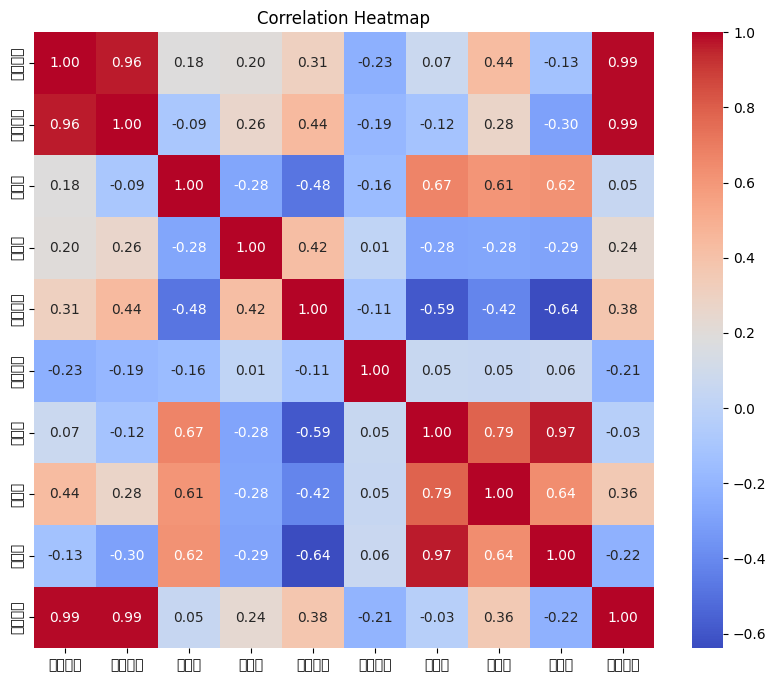

In [15]:
corr_matrix = train_df.corr()  # 상관계수 계산
plt.figure(figsize=(10, 8))  # 도화지 만들고
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f") # heatmap 그리기 
# (annot는 주석, cmap은 히트맵의 색깔, fmt는 소수점 몇번째 자리까지 표시)
plt.title('Correlation Heatmap')

In [16]:
from matplotlib import font_manager, rc

# 한글 폰트 경로 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 사용하고자 하는 한글 폰트의 경로로 수정
font_name = font_manager.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False  # '-' 부호가 정상적으로 표시되도록 설정

## 시각화

<Axes: xlabel='일교차', ylabel='평균기온'>

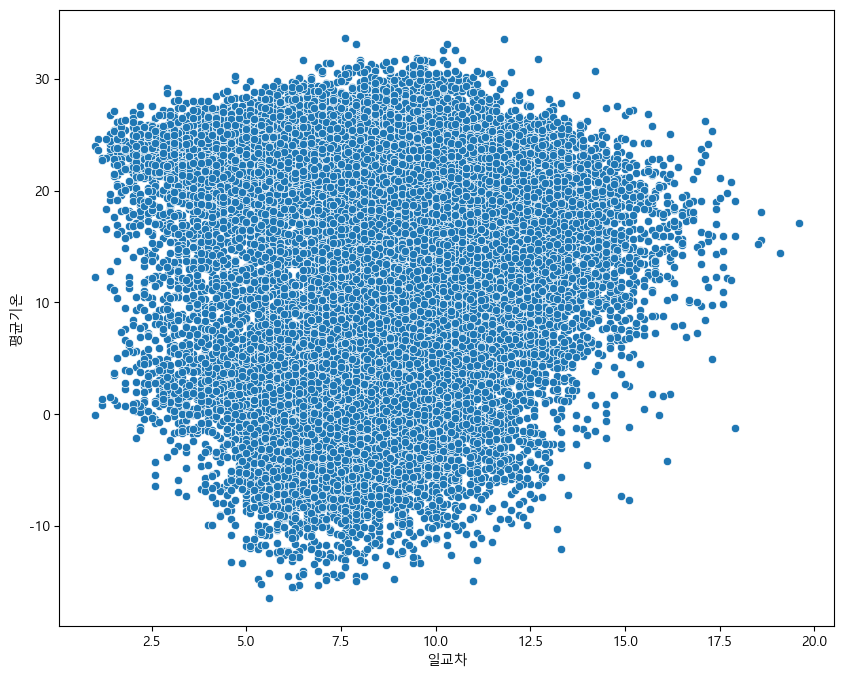

In [17]:
# 산점도
plt.figure(figsize=(10,8))
sns.scatterplot(data=train_df,x ='일교차',y='평균기온')

<Axes: xlabel='일교차', ylabel='평균기온'>

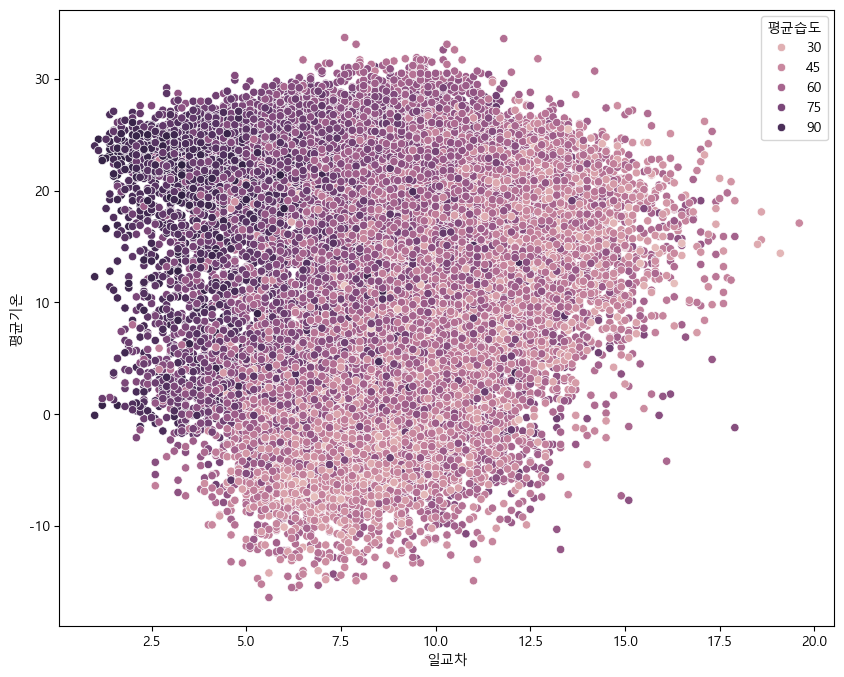

In [18]:
# hue에 따라 종류별 색깔 다르게 해서 산점도 표현
plt.figure(figsize=(10,8))
sns.scatterplot(data=train_df,x ='일교차',y='평균기온',hue='평균습도')
# 습도가 높은 날은 일교차가 적었다.

<Axes: xlabel='일교차', ylabel='평균습도'>

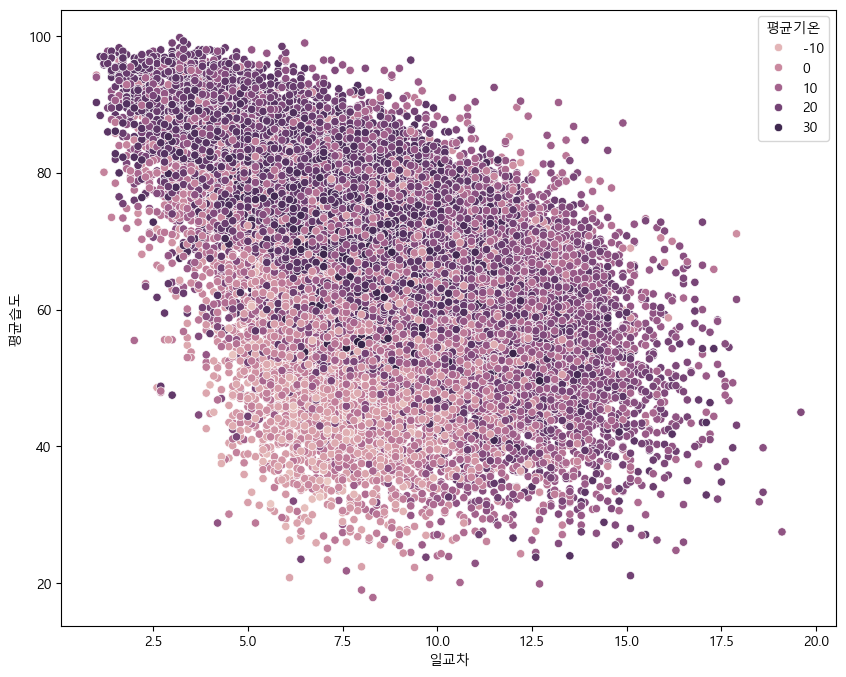

In [19]:
# hue에 따라 종류별 색깔 다르게 해서 산점도 표현
plt.figure(figsize=(10,8))
sns.scatterplot(data=train_df,x ='일교차',y='평균습도', hue = '평균기온')

# 습도가 낮고 일교차가 적으면 평균 기온이 낮음 -> 우리나라 겨울의 특성

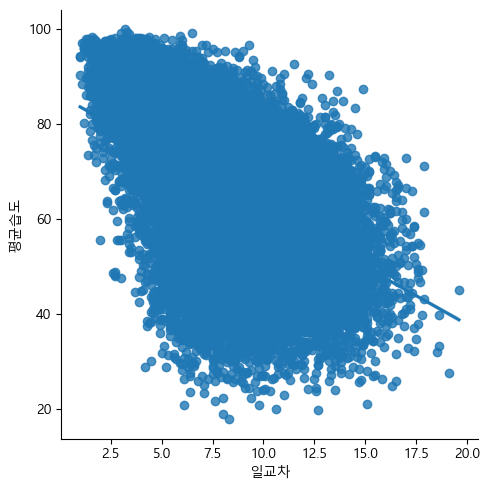

In [20]:
# 산점도에 회귀선 추가하는 코드
sns.lmplot(data=train_df,x ='일교차',y='평균습도')

<Axes: xlabel='일교차', ylabel='평균습도'>

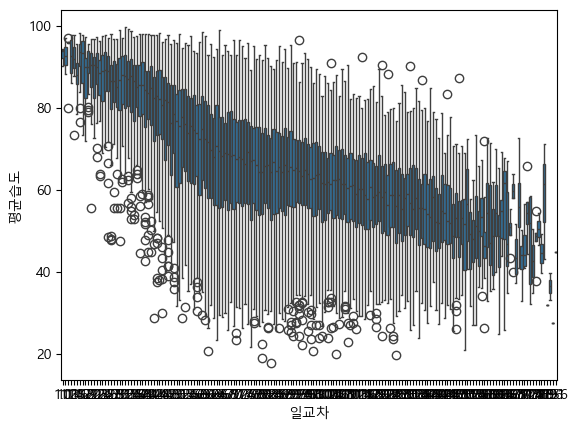

In [21]:
#boxplot

sns.boxplot(x ='일교차',y='평균습도',data=train_df)
# boxplot는 x축의 값이 categorical variable일 때 유용

<Axes: xlabel='일조율', ylabel='일조합'>

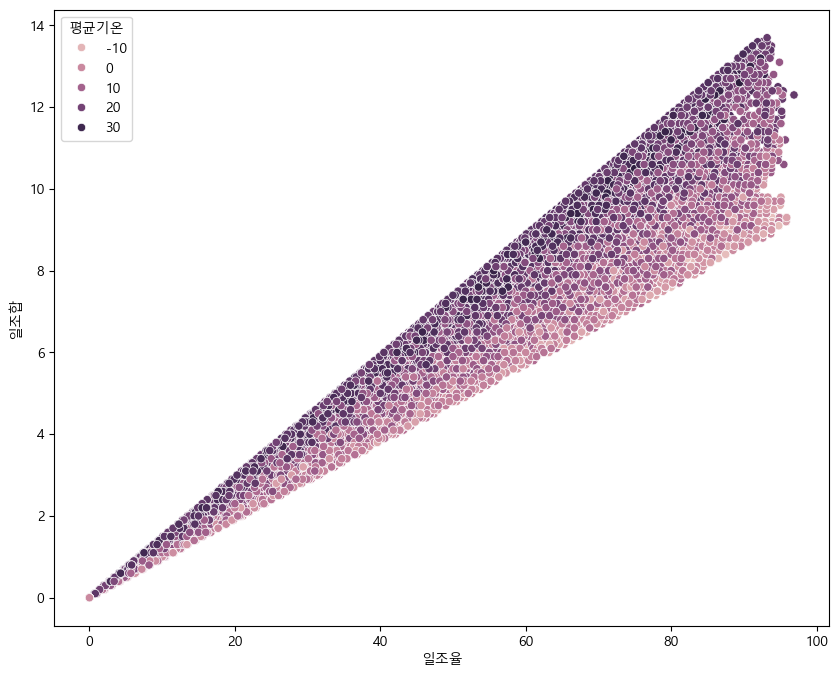

In [22]:
# 일조율과 일조합의 상관관계가 높기 때문에 산점도로 유사성 확인(높을 경우 변수 제거를 통한 결측치 처리 위함)

plt.figure(figsize=(10,8))
sns.scatterplot(data=train_df, x= '일조율', y= '일조합', hue = '평균기온')

<Axes: xlabel='일조율', ylabel='평균기온'>

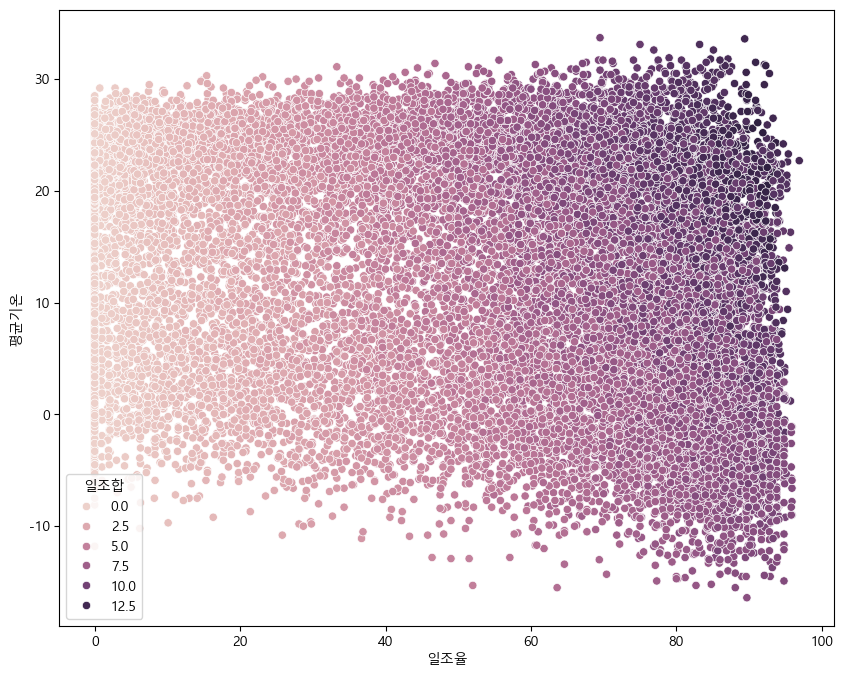

In [23]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=train_df, x= '일조율', y= '평균기온', hue = '일조합')

In [24]:
# 매우 높은 상관성 -> 결측치가 많은 일조율 제거
train_df = train_df.drop(columns = ['일조율'])
train_df

최고기온  최저기온   일교차  강수량  평균습도  평균풍속  일조합    일사합  평균기온
일시                                                             
1960-01-01   2.2  -5.2   7.4  NaN  68.3   1.7  6.7    NaN  -1.6
1960-01-02   1.2  -5.6   6.8  0.4  87.7   1.3  0.0    NaN  -1.9
1960-01-03   8.7  -2.1  10.8  0.0  81.3   3.0  0.0    NaN   4.0
1960-01-04  10.8   1.2   9.6  0.0  79.7   4.4  2.6    NaN   7.5
1960-01-05   1.3  -8.2   9.5  NaN  44.0   5.1  8.2    NaN  -4.6
...          ...   ...   ...  ...   ...   ...  ...    ...   ...
2022-12-27   3.3  -7.3  10.6  NaN  69.8   1.8  8.8  10.25  -2.6
2022-12-28   0.1  -6.0   6.1  0.1  58.1   2.5  8.7  10.86  -3.3
2022-12-29   2.1  -7.8   9.9  0.0  56.3   1.7  9.0  10.88  -2.9
2022-12-30   2.3  -4.4   6.7  0.0  65.6   1.9  7.9  10.84  -1.8
2022-12-31   2.1  -5.1   7.2  0.0  65.5   1.4  1.1   4.16  -1.2

[23003 rows x 9 columns]

<Axes: xlabel='일사합', ylabel='일조합'>

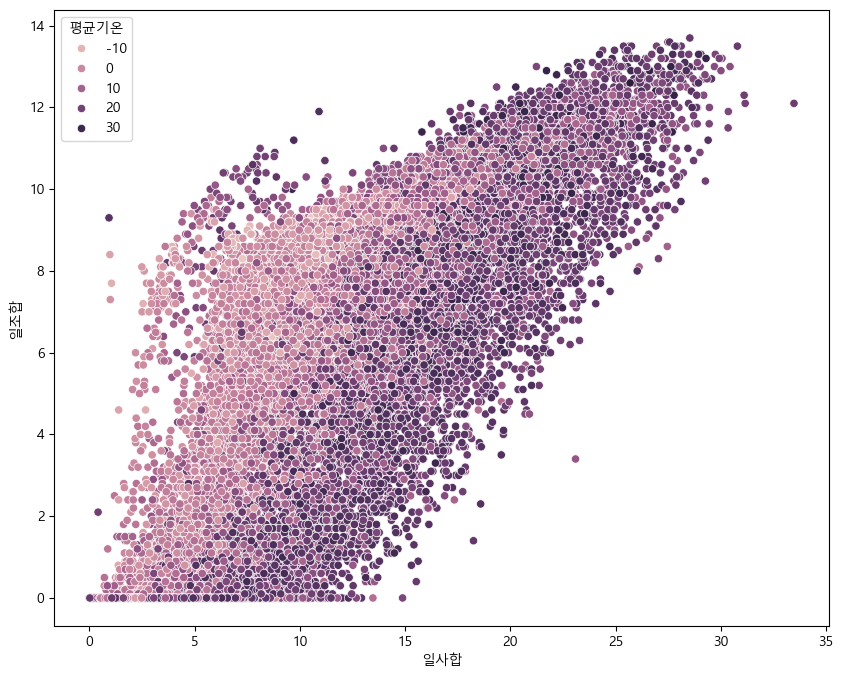

In [25]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=train_df, x='일사합', y = '일조합', hue = '평균기온')

In [26]:
# 평균기온 별로 보면 상관계수가 높음 따라서, 결측치가 많은 일사합 제거
train_df = train_df.drop(columns=['일사합'])
train_df

최고기온  최저기온   일교차  강수량  평균습도  평균풍속  일조합  평균기온
일시                                                      
1960-01-01   2.2  -5.2   7.4  NaN  68.3   1.7  6.7  -1.6
1960-01-02   1.2  -5.6   6.8  0.4  87.7   1.3  0.0  -1.9
1960-01-03   8.7  -2.1  10.8  0.0  81.3   3.0  0.0   4.0
1960-01-04  10.8   1.2   9.6  0.0  79.7   4.4  2.6   7.5
1960-01-05   1.3  -8.2   9.5  NaN  44.0   5.1  8.2  -4.6
...          ...   ...   ...  ...   ...   ...  ...   ...
2022-12-27   3.3  -7.3  10.6  NaN  69.8   1.8  8.8  -2.6
2022-12-28   0.1  -6.0   6.1  0.1  58.1   2.5  8.7  -3.3
2022-12-29   2.1  -7.8   9.9  0.0  56.3   1.7  9.0  -2.9
2022-12-30   2.3  -4.4   6.7  0.0  65.6   1.9  7.9  -1.8
2022-12-31   2.1  -5.1   7.2  0.0  65.5   1.4  1.1  -1.2

[23003 rows x 8 columns]

<Axes: xlabel='평균습도', ylabel='강수량'>

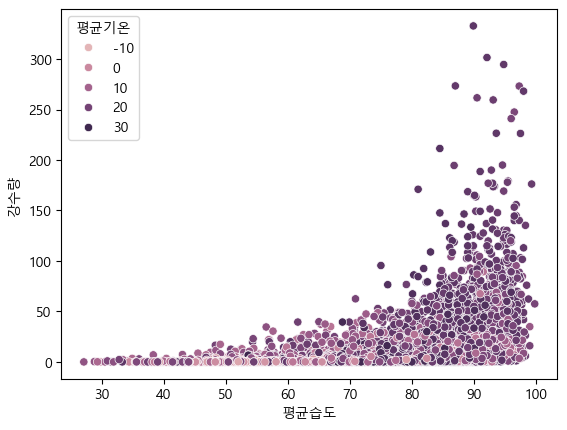

In [27]:
sns.scatterplot(data=train_df, x='평균습도', y = '강수량', hue = '평균기온')
# 습도가 높을수록 강수량이 많음 -> 강수량 제거 근거 + 강수량은 0이 너무 많다.
# 강수량이 높을 날 -> 온도가 높다. -> 우리나라 여름의 특성(장마)

In [28]:
# 최고/최저기온의 차가 일교차 -> 일교차도 제거
train_df = train_df.drop(columns=['강수량', '일교차'])
train_df

최고기온  최저기온  평균습도  평균풍속  일조합  평균기온
일시                                           
1960-01-01   2.2  -5.2  68.3   1.7  6.7  -1.6
1960-01-02   1.2  -5.6  87.7   1.3  0.0  -1.9
1960-01-03   8.7  -2.1  81.3   3.0  0.0   4.0
1960-01-04  10.8   1.2  79.7   4.4  2.6   7.5
1960-01-05   1.3  -8.2  44.0   5.1  8.2  -4.6
...          ...   ...   ...   ...  ...   ...
2022-12-27   3.3  -7.3  69.8   1.8  8.8  -2.6
2022-12-28   0.1  -6.0  58.1   2.5  8.7  -3.3
2022-12-29   2.1  -7.8  56.3   1.7  9.0  -2.9
2022-12-30   2.3  -4.4  65.6   1.9  7.9  -1.8
2022-12-31   2.1  -5.1  65.5   1.4  1.1  -1.2

[23003 rows x 6 columns]

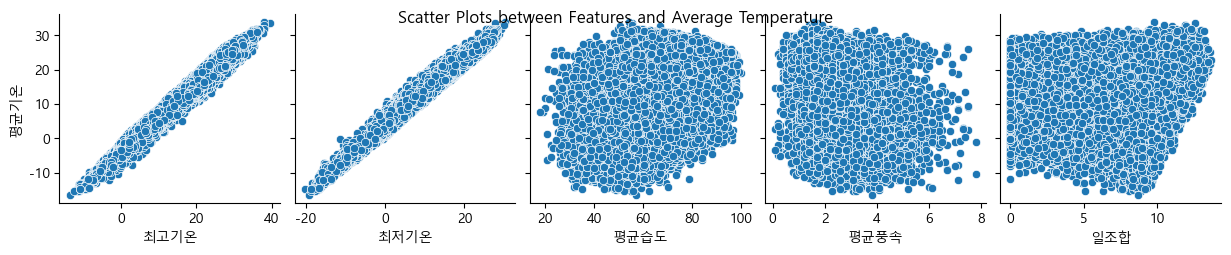

In [29]:
# 설명변수와 예측변수 간의 산점도 행렬
sns.pairplot(train_df, x_vars=['최고기온', '최저기온', '평균습도',	'평균풍속',	'일조합'], y_vars=['평균기온'])
plt.suptitle('Scatter Plots between Features and Average Temperature')
plt.show()

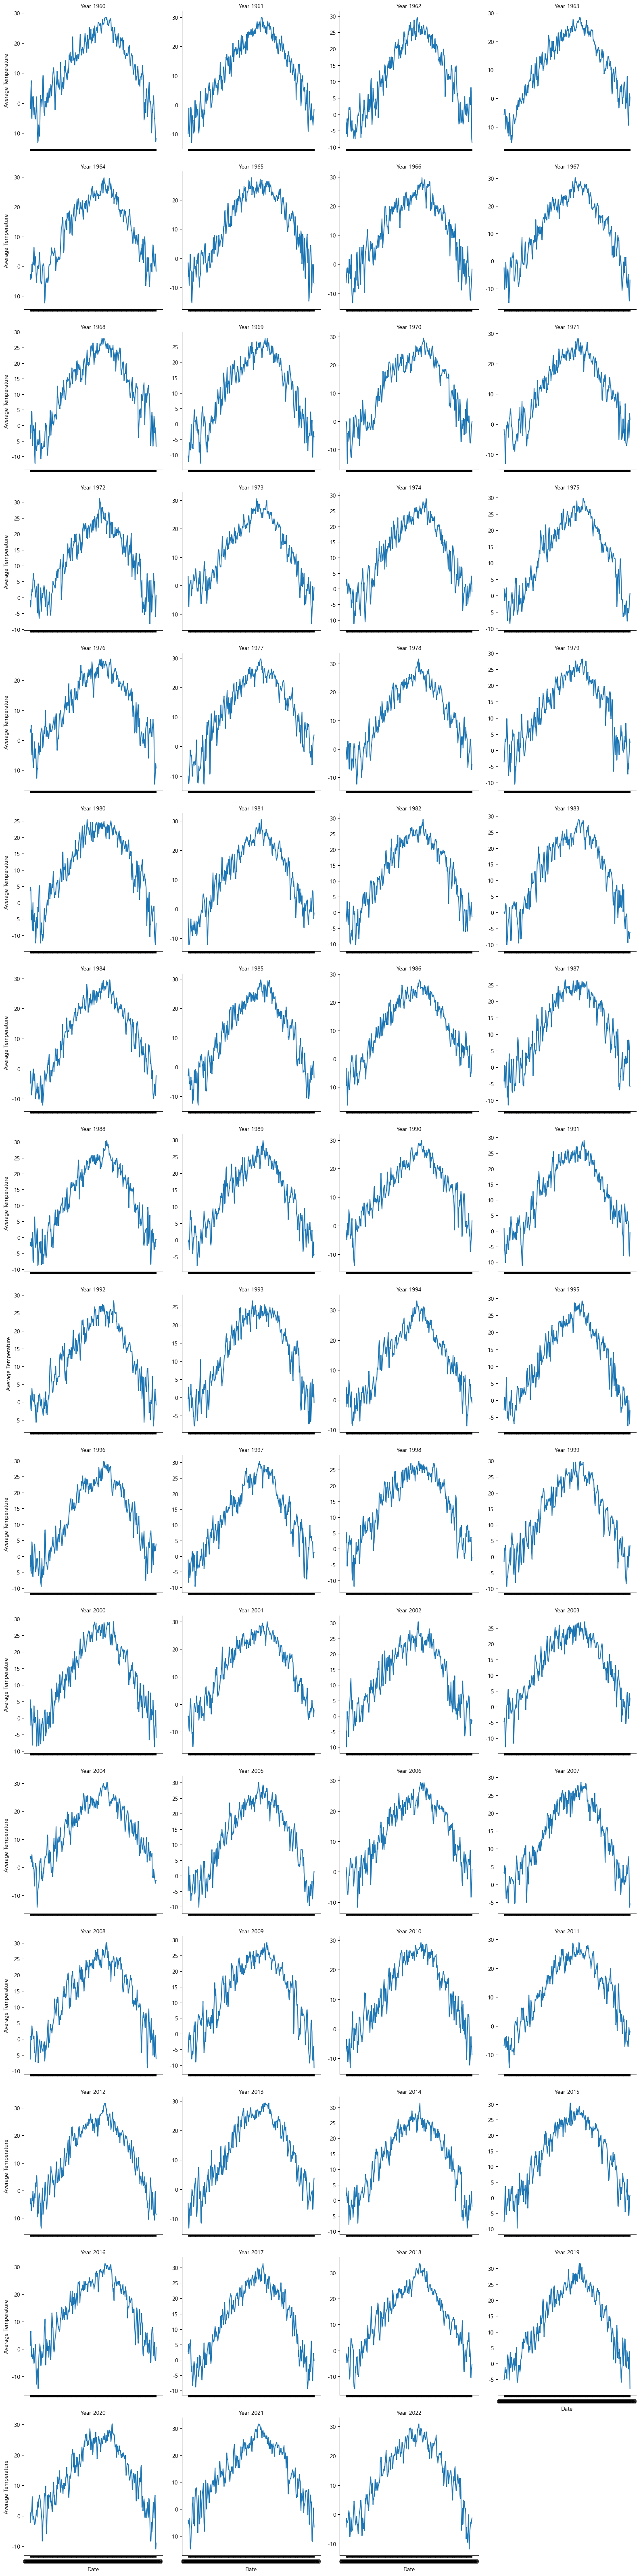

In [30]:
train_df['일시'] = pd.to_datetime(train_df.index)

# '년도' 정보를 추출하여 새로운 변수 생성
train_df['년도'] = train_df['일시'].dt.year

# '월일' 변수 생성
train_df['월일'] = train_df['일시'].dt.strftime('%m-%d')

# 년도별로 따로 그래프를 출력
g = sns.FacetGrid(train_df, col='년도', col_wrap=4, height=4, sharey=False)
g.map(sns.lineplot, '월일', '평균기온', sort=False)  # sort=False로 설정하여 월-일 순서를 유지
g.set_axis_labels('Date', 'Average Temperature')
g.set_titles('Year {col_name}')
plt.show()

# 연도별 주기성이 나타남

In [31]:
train_df

최고기온  최저기온  평균습도  평균풍속  일조합  평균기온         일시    년도     월일
일시                                                                   
1960-01-01   2.2  -5.2  68.3   1.7  6.7  -1.6 1960-01-01  1960  01-01
1960-01-02   1.2  -5.6  87.7   1.3  0.0  -1.9 1960-01-02  1960  01-02
1960-01-03   8.7  -2.1  81.3   3.0  0.0   4.0 1960-01-03  1960  01-03
1960-01-04  10.8   1.2  79.7   4.4  2.6   7.5 1960-01-04  1960  01-04
1960-01-05   1.3  -8.2  44.0   5.1  8.2  -4.6 1960-01-05  1960  01-05
...          ...   ...   ...   ...  ...   ...        ...   ...    ...
2022-12-27   3.3  -7.3  69.8   1.8  8.8  -2.6 2022-12-27  2022  12-27
2022-12-28   0.1  -6.0  58.1   2.5  8.7  -3.3 2022-12-28  2022  12-28
2022-12-29   2.1  -7.8  56.3   1.7  9.0  -2.9 2022-12-29  2022  12-29
2022-12-30   2.3  -4.4  65.6   1.9  7.9  -1.8 2022-12-30  2022  12-30
2022-12-31   2.1  -5.1  65.5   1.4  1.1  -1.2 2022-12-31  2022  12-31

[23003 rows x 9 columns]

In [32]:
train_df = train_df.drop(columns=['년도', '월일'])
train_df

최고기온  최저기온  평균습도  평균풍속  일조합  평균기온         일시
일시                                                      
1960-01-01   2.2  -5.2  68.3   1.7  6.7  -1.6 1960-01-01
1960-01-02   1.2  -5.6  87.7   1.3  0.0  -1.9 1960-01-02
1960-01-03   8.7  -2.1  81.3   3.0  0.0   4.0 1960-01-03
1960-01-04  10.8   1.2  79.7   4.4  2.6   7.5 1960-01-04
1960-01-05   1.3  -8.2  44.0   5.1  8.2  -4.6 1960-01-05
...          ...   ...   ...   ...  ...   ...        ...
2022-12-27   3.3  -7.3  69.8   1.8  8.8  -2.6 2022-12-27
2022-12-28   0.1  -6.0  58.1   2.5  8.7  -3.3 2022-12-28
2022-12-29   2.1  -7.8  56.3   1.7  9.0  -2.9 2022-12-29
2022-12-30   2.3  -4.4  65.6   1.9  7.9  -1.8 2022-12-30
2022-12-31   2.1  -5.1  65.5   1.4  1.1  -1.2 2022-12-31

[23003 rows x 7 columns]

In [33]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 23003 entries, 1960-01-01 to 2022-12-31
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   최고기온    23003 non-null  float64       
 1   최저기온    23003 non-null  float64       
 2   평균습도    23003 non-null  float64       
 3   평균풍속    23003 non-null  float64       
 4   일조합     22887 non-null  float64       
 5   평균기온    23003 non-null  float64       
 6   일시      23003 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(6)
memory usage: 1.4 MB


In [34]:
# 파생변수 생성 (날짜)

train_df['일시'] = train_df['일시'].astype(str)

time_pattern = r'(\d{4})-(\d{1,2})-(\d{1,2})'

train_df[['연', '월', '일']] = train_df['일시'].str.extract(time_pattern)
train_df[['연', '월', '일']] = train_df[['연', '월', '일']].apply(pd.to_numeric) # 추출된 문자열을 수치화해줍니다
train_df = train_df.drop(columns=['일시']) # 정보 추출이 완료된 '일시' 컬럼은 제거합니다

In [35]:
train_df

최고기온  최저기온  평균습도  평균풍속  일조합  평균기온     연   월   일
일시                                                         
1960-01-01   2.2  -5.2  68.3   1.7  6.7  -1.6  1960   1   1
1960-01-02   1.2  -5.6  87.7   1.3  0.0  -1.9  1960   1   2
1960-01-03   8.7  -2.1  81.3   3.0  0.0   4.0  1960   1   3
1960-01-04  10.8   1.2  79.7   4.4  2.6   7.5  1960   1   4
1960-01-05   1.3  -8.2  44.0   5.1  8.2  -4.6  1960   1   5
...          ...   ...   ...   ...  ...   ...   ...  ..  ..
2022-12-27   3.3  -7.3  69.8   1.8  8.8  -2.6  2022  12  27
2022-12-28   0.1  -6.0  58.1   2.5  8.7  -3.3  2022  12  28
2022-12-29   2.1  -7.8  56.3   1.7  9.0  -2.9  2022  12  29
2022-12-30   2.3  -4.4  65.6   1.9  7.9  -1.8  2022  12  30
2022-12-31   2.1  -5.1  65.5   1.4  1.1  -1.2  2022  12  31

[23003 rows x 9 columns]

In [36]:
# 월 기준으로 평균기온 나누기 
monthly = train_df[['월','평균기온']].groupby('월').mean()
monthly.columns = ['monthly']

In [37]:
monthly

monthly
월            
1   -2.694572
2   -0.157448
3    5.414593
4   12.221587
5   17.809575
6   22.108519
7   25.067572
8   25.737295
9   21.159206
10  14.677231
11   7.124709
12  -0.173552

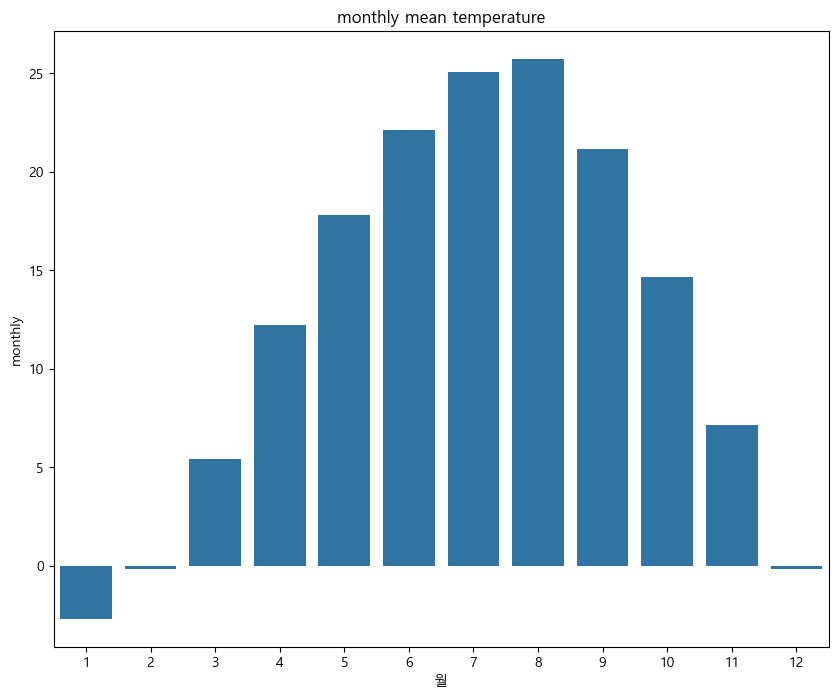

In [38]:
plt.figure(figsize=(10, 8))
sns.barplot(x=monthly.index, y='monthly', data=monthly)
plt.title('monthly mean temperature')
plt.show()

In [39]:
# 5월이 애매해서 5월만 보기
for i in monthly.index: 
    df = train_df[train_df['월'] == i]
    globals()[f"month_{i}"] = df

In [40]:
month_1

최고기온  최저기온  평균습도  평균풍속  일조합  평균기온     연  월   일
일시                                                        
1960-01-01   2.2  -5.2  68.3   1.7  6.7  -1.6  1960  1   1
1960-01-02   1.2  -5.6  87.7   1.3  0.0  -1.9  1960  1   2
1960-01-03   8.7  -2.1  81.3   3.0  0.0   4.0  1960  1   3
1960-01-04  10.8   1.2  79.7   4.4  2.6   7.5  1960  1   4
1960-01-05   1.3  -8.2  44.0   5.1  8.2  -4.6  1960  1   5
...          ...   ...   ...   ...  ...   ...   ... ..  ..
2022-01-27   4.0  -4.6  50.0   2.1  8.9  -1.1  2022  1  27
2022-01-28   2.1  -5.9  51.6   2.8  9.2  -2.7  2022  1  28
2022-01-29   0.9  -7.2  48.9   2.4  9.5  -3.6  2022  1  29
2022-01-30   2.4  -8.0  45.4   2.2  9.6  -2.8  2022  1  30
2022-01-31   4.8  -6.8  59.0   1.9  8.0  -0.7  2022  1  31

[1953 rows x 9 columns]

In [41]:
def categorize_day(day):
    if day <= 10:
        return '초반'
    elif day <= 20:
        return '중반'
    else:
        return '후반'
    
for i in monthly.index:
    df = globals()[f"month_{i}"]
    df['day'] = df['일'].apply(lambda x: categorize_day(x))
    globals()[f"month_{i}"] = df


C:\Users\DOHS\AppData\Local\Temp\ipykernel_19204\2161824737.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day'] = df['일'].apply(lambda x: categorize_day(x))
C:\Users\DOHS\AppData\Local\Temp\ipykernel_19204\2161824737.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day'] = df['일'].apply(lambda x: categorize_day(x))
C:\Users\DOHS\AppData\Local\Temp\ipykernel_19204\2161824737.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

In [42]:
month_1

최고기온  최저기온  평균습도  평균풍속  일조합  평균기온     연  월   일 day
일시                                                            
1960-01-01   2.2  -5.2  68.3   1.7  6.7  -1.6  1960  1   1  초반
1960-01-02   1.2  -5.6  87.7   1.3  0.0  -1.9  1960  1   2  초반
1960-01-03   8.7  -2.1  81.3   3.0  0.0   4.0  1960  1   3  초반
1960-01-04  10.8   1.2  79.7   4.4  2.6   7.5  1960  1   4  초반
1960-01-05   1.3  -8.2  44.0   5.1  8.2  -4.6  1960  1   5  초반
...          ...   ...   ...   ...  ...   ...   ... ..  ..  ..
2022-01-27   4.0  -4.6  50.0   2.1  8.9  -1.1  2022  1  27  후반
2022-01-28   2.1  -5.9  51.6   2.8  9.2  -2.7  2022  1  28  후반
2022-01-29   0.9  -7.2  48.9   2.4  9.5  -3.6  2022  1  29  후반
2022-01-30   2.4  -8.0  45.4   2.2  9.6  -2.8  2022  1  30  후반
2022-01-31   4.8  -6.8  59.0   1.9  8.0  -0.7  2022  1  31  후반

[1953 rows x 10 columns]

In [43]:
for i in monthly.index:
    df = globals()[f"month_{i}"]
    may = df[['day','평균기온']].groupby('day').mean()
    may.columns = ['may']
    globals()[f"day_{i}"] = may

In [44]:
day_3

may
day          
중반   5.570000
초반   3.257619
후반   7.234199

In [45]:
plt.figure(figsize=(10, 8))
sns.barplot(x=day_5.index, y='may', data=day_5)
plt.title('may mean temperature')
plt.show()

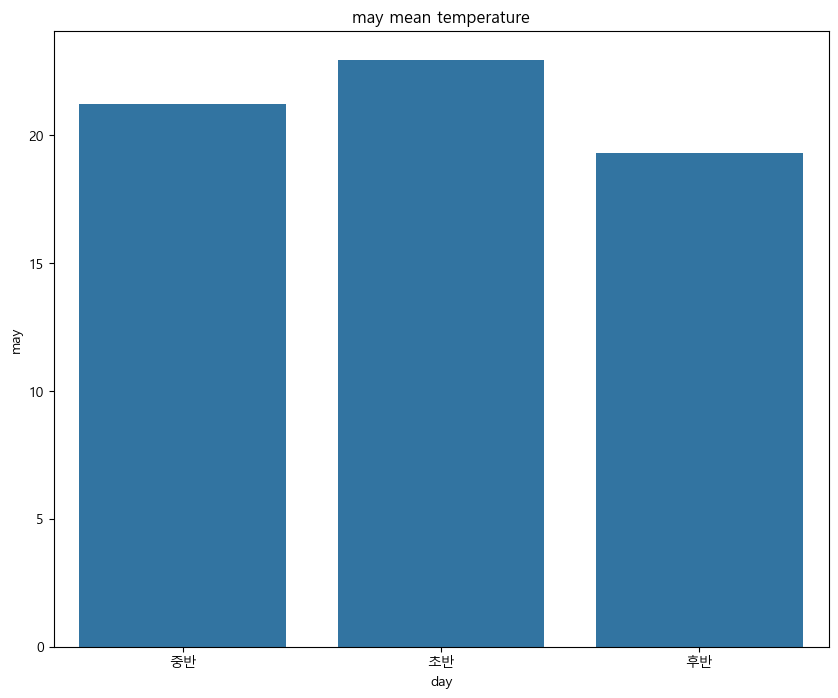

In [46]:
plt.figure(figsize=(10, 8))
sns.barplot(x=day_9.index, y='may', data=day_9)
plt.title('may mean temperature')
plt.show()

In [47]:
plt.figure(figsize=(10, 8))
sns.barplot(x=day_4.index, y='may', data=day_4)
plt.title('may mean temperature')
plt.show()

초중후반의 차이가 크기 때문에 따로 생성 필요

In [48]:
# 연 기준으로 평균기온 나누기 
year = train_df[['연','평균기온']].groupby('연').mean()
year.columns = ['year']

In [49]:
year

year
연              
1960  12.104645
1961  12.454521
1962  11.756986
1963  11.312877
1964  12.221038
...         ...
2018  13.002466
2019  13.598904
2020  13.271858
2021  13.752055
2022  13.259066

[63 rows x 1 columns]

In [50]:
plt.figure(figsize=(10, 8))
sns.lineplot(x=year.index, y='year', data=year)
plt.title('may mean temperature')
plt.show()

# 연평균 기온 상승 -> 지구온난화

In [51]:
train_df

최고기온  최저기온  평균습도  평균풍속  일조합  평균기온     연   월   일
일시                                                         
1960-01-01   2.2  -5.2  68.3   1.7  6.7  -1.6  1960   1   1
1960-01-02   1.2  -5.6  87.7   1.3  0.0  -1.9  1960   1   2
1960-01-03   8.7  -2.1  81.3   3.0  0.0   4.0  1960   1   3
1960-01-04  10.8   1.2  79.7   4.4  2.6   7.5  1960   1   4
1960-01-05   1.3  -8.2  44.0   5.1  8.2  -4.6  1960   1   5
...          ...   ...   ...   ...  ...   ...   ...  ..  ..
2022-12-27   3.3  -7.3  69.8   1.8  8.8  -2.6  2022  12  27
2022-12-28   0.1  -6.0  58.1   2.5  8.7  -3.3  2022  12  28
2022-12-29   2.1  -7.8  56.3   1.7  9.0  -2.9  2022  12  29
2022-12-30   2.3  -4.4  65.6   1.9  7.9  -1.8  2022  12  30
2022-12-31   2.1  -5.1  65.5   1.4  1.1  -1.2  2022  12  31

[23003 rows x 9 columns]

In [52]:
# 초/중/후반 파생변수 생성
train_df['slice'] = train_df['일'].apply(lambda x: categorize_day(x))
train_df

최고기온  최저기온  평균습도  평균풍속  일조합  평균기온     연   월   일 slice
일시                                                               
1960-01-01   2.2  -5.2  68.3   1.7  6.7  -1.6  1960   1   1    초반
1960-01-02   1.2  -5.6  87.7   1.3  0.0  -1.9  1960   1   2    초반
1960-01-03   8.7  -2.1  81.3   3.0  0.0   4.0  1960   1   3    초반
1960-01-04  10.8   1.2  79.7   4.4  2.6   7.5  1960   1   4    초반
1960-01-05   1.3  -8.2  44.0   5.1  8.2  -4.6  1960   1   5    초반
...          ...   ...   ...   ...  ...   ...   ...  ..  ..   ...
2022-12-27   3.3  -7.3  69.8   1.8  8.8  -2.6  2022  12  27    후반
2022-12-28   0.1  -6.0  58.1   2.5  8.7  -3.3  2022  12  28    후반
2022-12-29   2.1  -7.8  56.3   1.7  9.0  -2.9  2022  12  29    후반
2022-12-30   2.3  -4.4  65.6   1.9  7.9  -1.8  2022  12  30    후반
2022-12-31   2.1  -5.1  65.5   1.4  1.1  -1.2  2022  12  31    후반

[23003 rows x 10 columns]

In [53]:
train_df

최고기온  최저기온  평균습도  평균풍속  일조합  평균기온     연   월   일 slice
일시                                                               
1960-01-01   2.2  -5.2  68.3   1.7  6.7  -1.6  1960   1   1    초반
1960-01-02   1.2  -5.6  87.7   1.3  0.0  -1.9  1960   1   2    초반
1960-01-03   8.7  -2.1  81.3   3.0  0.0   4.0  1960   1   3    초반
1960-01-04  10.8   1.2  79.7   4.4  2.6   7.5  1960   1   4    초반
1960-01-05   1.3  -8.2  44.0   5.1  8.2  -4.6  1960   1   5    초반
...          ...   ...   ...   ...  ...   ...   ...  ..  ..   ...
2022-12-27   3.3  -7.3  69.8   1.8  8.8  -2.6  2022  12  27    후반
2022-12-28   0.1  -6.0  58.1   2.5  8.7  -3.3  2022  12  28    후반
2022-12-29   2.1  -7.8  56.3   1.7  9.0  -2.9  2022  12  29    후반
2022-12-30   2.3  -4.4  65.6   1.9  7.9  -1.8  2022  12  30    후반
2022-12-31   2.1  -5.1  65.5   1.4  1.1  -1.2  2022  12  31    후반

[23003 rows x 10 columns]

## categorical varaible 변환

In [54]:
train_df

최고기온  최저기온  평균습도  평균풍속  일조합  평균기온     연   월   일 slice
일시                                                               
1960-01-01   2.2  -5.2  68.3   1.7  6.7  -1.6  1960   1   1    초반
1960-01-02   1.2  -5.6  87.7   1.3  0.0  -1.9  1960   1   2    초반
1960-01-03   8.7  -2.1  81.3   3.0  0.0   4.0  1960   1   3    초반
1960-01-04  10.8   1.2  79.7   4.4  2.6   7.5  1960   1   4    초반
1960-01-05   1.3  -8.2  44.0   5.1  8.2  -4.6  1960   1   5    초반
...          ...   ...   ...   ...  ...   ...   ...  ..  ..   ...
2022-12-27   3.3  -7.3  69.8   1.8  8.8  -2.6  2022  12  27    후반
2022-12-28   0.1  -6.0  58.1   2.5  8.7  -3.3  2022  12  28    후반
2022-12-29   2.1  -7.8  56.3   1.7  9.0  -2.9  2022  12  29    후반
2022-12-30   2.3  -4.4  65.6   1.9  7.9  -1.8  2022  12  30    후반
2022-12-31   2.1  -5.1  65.5   1.4  1.1  -1.2  2022  12  31    후반

[23003 rows x 10 columns]

In [55]:
one=pd.get_dummies(train_df['slice'],dtype=int)
train_df = train_df.drop(columns=['slice'])
train_df=pd.concat([train_df,one],axis=1)
train_df

최고기온  최저기온  평균습도  평균풍속  일조합  평균기온     연   월   일  중반  초반  후반
일시                                                                     
1960-01-01   2.2  -5.2  68.3   1.7  6.7  -1.6  1960   1   1   0   1   0
1960-01-02   1.2  -5.6  87.7   1.3  0.0  -1.9  1960   1   2   0   1   0
1960-01-03   8.7  -2.1  81.3   3.0  0.0   4.0  1960   1   3   0   1   0
1960-01-04  10.8   1.2  79.7   4.4  2.6   7.5  1960   1   4   0   1   0
1960-01-05   1.3  -8.2  44.0   5.1  8.2  -4.6  1960   1   5   0   1   0
...          ...   ...   ...   ...  ...   ...   ...  ..  ..  ..  ..  ..
2022-12-27   3.3  -7.3  69.8   1.8  8.8  -2.6  2022  12  27   0   0   1
2022-12-28   0.1  -6.0  58.1   2.5  8.7  -3.3  2022  12  28   0   0   1
2022-12-29   2.1  -7.8  56.3   1.7  9.0  -2.9  2022  12  29   0   0   1
2022-12-30   2.3  -4.4  65.6   1.9  7.9  -1.8  2022  12  30   0   0   1
2022-12-31   2.1  -5.1  65.5   1.4  1.1  -1.2  2022  12  31   0   0   1

[23003 rows x 12 columns]

In [56]:
## 주기성 고려
# 날짜
train_df['sin_date'] = -np.sin(2 * np.pi * (train_df['월']+train_df['일']/31)/12)
train_df['cos_date'] = -np.sin(2 * np.pi * (train_df['월']+train_df['일']/31)/12)
# 월
train_df['sin_month'] = -np.sin(2 * np.pi * train_df['월']/12.0)
train_df['cos_month'] = -np.cos(2 * np.pi * train_df['월']/12.0)

In [57]:
# 계절변수 추가

train_df['season'] = '-'
train_df.loc[(train_df['월'] == 3) | (train_df['월'] == 4) | (train_df['월'] == 5), 'season'] = 0
train_df.loc[(train_df['월'] == 6) | (train_df['월'] == 7) | (train_df['월'] == 8), 'season'] = 1
train_df.loc[(train_df['월'] == 9) | (train_df['월'] == 10) | (train_df['월'] == 11), 'season'] = 2
train_df.loc[(train_df['월'] == 12) | (train_df['월'] == 1) | (train_df['월'] == 2), 'season'] = 3
train_df.loc[(train_df['season'] == '-'), 'season'] = 4

In [58]:
train_df['season'] = train_df['season'].astype(int)

In [59]:
train_df

최고기온  최저기온  평균습도  평균풍속  일조합  평균기온     연   월   일  중반  초반  후반  \
일시                                                                        
1960-01-01   2.2  -5.2  68.3   1.7  6.7  -1.6  1960   1   1   0   1   0   
1960-01-02   1.2  -5.6  87.7   1.3  0.0  -1.9  1960   1   2   0   1   0   
1960-01-03   8.7  -2.1  81.3   3.0  0.0   4.0  1960   1   3   0   1   0   
1960-01-04  10.8   1.2  79.7   4.4  2.6   7.5  1960   1   4   0   1   0   
1960-01-05   1.3  -8.2  44.0   5.1  8.2  -4.6  1960   1   5   0   1   0   
...          ...   ...   ...   ...  ...   ...   ...  ..  ..  ..  ..  ..   
2022-12-27   3.3  -7.3  69.8   1.8  8.8  -2.6  2022  12  27   0   0   1   
2022-12-28   0.1  -6.0  58.1   2.5  8.7  -3.3  2022  12  28   0   0   1   
2022-12-29   2.1  -7.8  56.3   1.7  9.0  -2.9  2022  12  29   0   0   1   
2022-12-30   2.3  -4.4  65.6   1.9  7.9  -1.8  2022  12  30   0   0   1   
2022-12-31   2.1  -5.1  65.5   1.4  1.1  -1.2  2022  12  31   0   0   1   

            sin_date  cos_date     sin_month  cos_month  season  
일시                                                               
1960-01-01 -0.514555 -0.514555 -5.000000e-01  -0.866025       3  
1960-01-02 -0.528964 -0.528964 -5.000000e-01  -0.866025       3  
1960-01-03 -0.543222 -0.543222 -5.000000e-01  -0.866025       3  
1960-01-04 -0.557324 -0.557324 -5.000000e-01  -0.866025       3  
1960-01-05 -0.571268 -0.571268 -5.000000e-01  -0.866025       3  
...              ...       ...           ...        ...     ...  
2022-12-27 -0.440394 -0.440394  2.449294e-16  -1.000000       3  
2022-12-28 -0.455495 -0.455495  2.449294e-16  -1.000000       3  
2022-12-29 -0.470465 -0.470465  2.449294e-16  -1.000000       3  
2022-12-30 -0.485302 -0.485302  2.449294e-16  -1.000000       3  
2022-12-31 -0.500000 -0.500000  2.449294e-16  -1.000000       3  

[23003 rows x 17 columns]

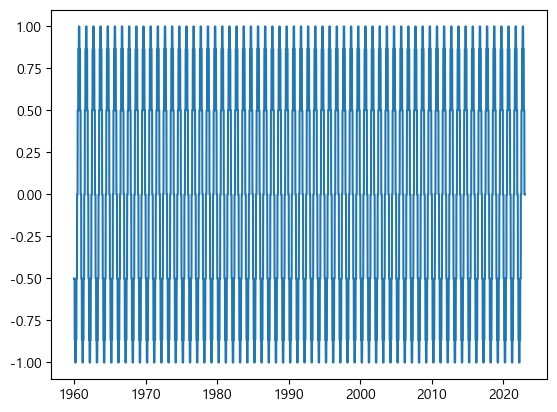

In [60]:
plt.plot(train_df['sin_month'])

<Axes: xlabel='season', ylabel='sin_month'>

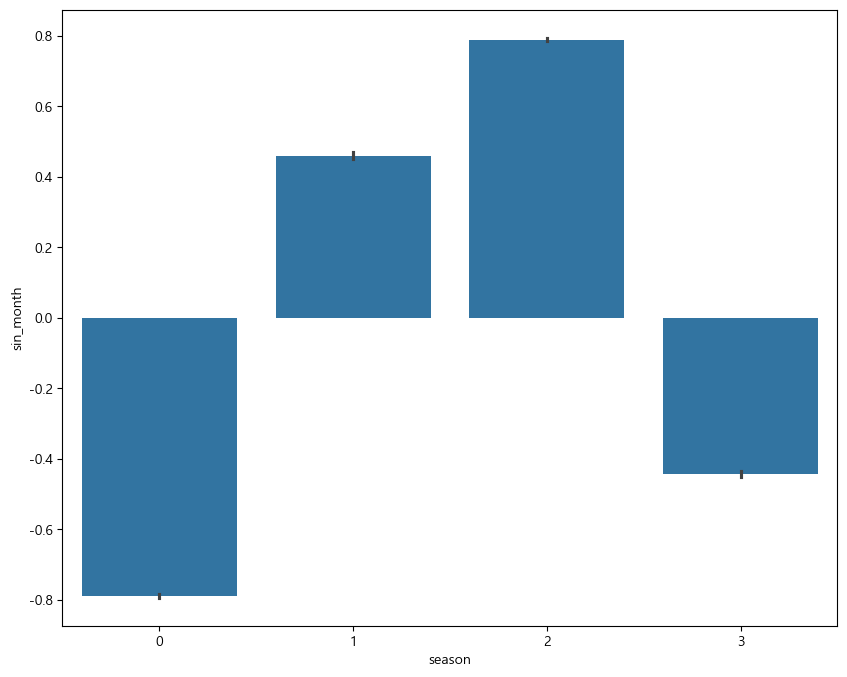

In [61]:
plt.figure(figsize=(10,8))
sns.barplot(data=train_df, x='season', y = 'sin_month')

<Axes: xlabel='월', ylabel='sin_month'>

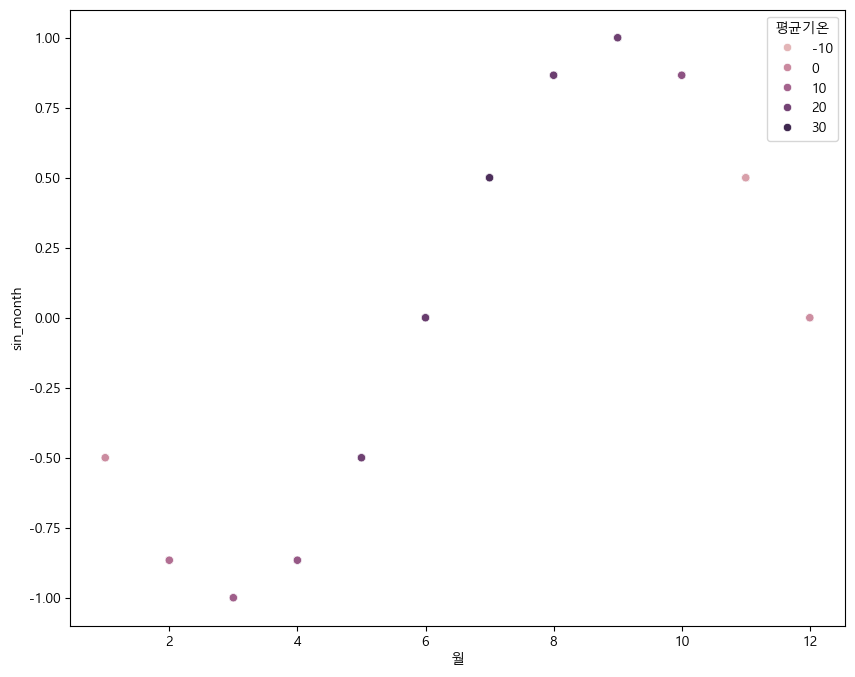

In [62]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=train_df, x='월', y = 'sin_month', hue = '평균기온')

<Axes: xlabel='cos_month', ylabel='sin_month'>

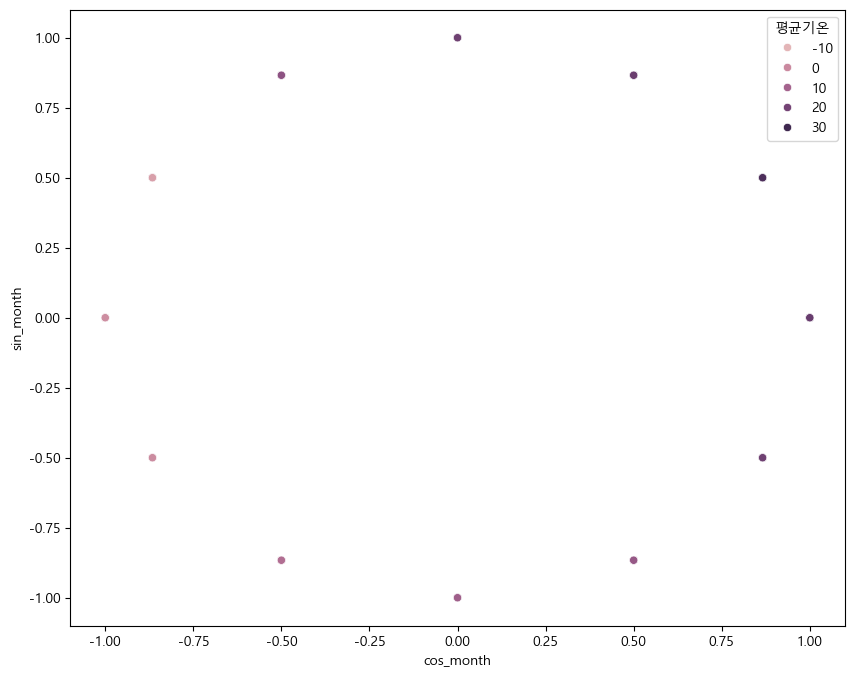

In [63]:
plt.figure(figsize=(10,8)) 
sns.scatterplot(data=train_df, x='cos_month', y = 'sin_month', hue = '평균기온')